# Notebook description:

In this Notebook, the given tasks should be performed and the following questions need to be answered through analysing the prescribed dataset. The dataset contains two separate files for training and testing. 


In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

C:\Users\naserya\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\naserya\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\naserya\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\naserya\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#loading dataset
train=pd.read_csv('LoanPrediction_TrainSet.csv')
test=pd.read_csv('LoanPrediction_TestSet.csv')

# Data Exploration:

1- Present the basic summary of the train dataset using Analytics Base Table (ABT).

2- List top 5 (five) highly correlated variables with the target variable ‘LoanStatus’.

3- Group the instances of the train dataset into four bins considering ‘Dependents’ (0, 1, 2 and 3+) and plot a bar chart illustrating the binning.

# Data Pre-processing:

4- Find out the missing values in the train dataset and make a list of the variables with missing/invalid values. Fill the missing values with the Mean for numeric values and Mode for categorical values in the corresponding columns.

5- List the variables with categorical values and encode them into numeric values. For example, convert Y and N in ‘LoanStatus’ column to 1 and 0.

6- Count the number of instances for each of the labels of ‘LoanStatus’. Upsample the minority class with your preferred method.
Feature Engineering: All the available features from the dataset are to be used in training the models for loan status prediction. However, computing some additional features might help the model to predict the outcome with increased accuracy. For example, a new feature with the instalment amount can be derived as the dataset contains the total loan amount and the planned number of months for repayment. Likewise, new features can be added for total income and the remaining income after paying the instalments. Thus, in addition to the available features you will construct the following three features:

7- new feature ‘TotalIncome’ by adding ‘ApplicantIncome’ and ‘CoapplicantIncome’ for each instance.

8- A new feature ‘InstalmentAmount’ from ‘LoanAmount’ and ‘LoanAmountTerm’.

9- Calculate the ‘BalancedIncome’ feature by subtracting the ‘InstalmentAmount’ from the ‘TotalIncome’.

# Development of Predictive Models:

10- Which type of machine learning (classification or regression) model can be developed using the given train dataset for predicting ‘LoanStatus’? Justify your answer with appropriate reasoning.

 11- Train the appropriate machine learning model and report the trained model’s performance.

12-Develop a decision tree to predict the ‘LoanStatus’ and report the number of splits in the train dataset.

# Evaluation and Discussion:

 13- Using the two developed models, predict ‘LoanStatus’ for the test dataset. Report the performance measures discussed in [link to module] for each model by comparing them with the true values in the test dataset.

14- Which model performance is better in loan status prediction?

15- Apart from the instructions above, which other steps could be performed to develop a more accurate model for loan status prediction? Additional steps can be advised with respect to the course lecture on Common steps in building predictive models [Link to the Lecture]. For example, data preprocessing, model tuning, model validation, etc. Implement the additional steps and discuss them in your own words.

In [3]:
# Display the head of the data
train.head()


,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [5]:
# Display the shape of the data
train.shape

(614, 14)

In [6]:
# Display the types of the data
train.dtypes

Unnamed: 0             int64
LoanID                object
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea          object
LoanStatus            object
dtype: object

In [7]:
# # Checking the missing values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         614 non-null    int64  
 1   LoanID             614 non-null    object 
 2   Gender             601 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    object 
 5   Education          614 non-null    object 
 6   SelfEmployed       582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  LoanAmountTerm     600 non-null    float64
 11  CreditHistory      564 non-null    float64
 12  PropertyArea       614 non-null    object 
 13  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [8]:
# describe the statistics of numericals data
train.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,306.500000,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,177.390811,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,153.250000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,306.500000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,459.750000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,613.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Handling Null values
train.isnull().sum()

Unnamed: 0            0
LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [10]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['SelfEmployed']=train['SelfEmployed'].fillna(train['SelfEmployed'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['LoanAmountTerm']=train['LoanAmountTerm'].fillna(train['LoanAmountTerm'].mode()[0])
train['CreditHistory']=train['CreditHistory'].fillna(train['CreditHistory'].mode()[0])


In [11]:
train.isnull().sum()

Unnamed: 0           0
LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

In [12]:
train.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
train.LoanStatus.value_counts()

Y    422
N    192
Name: LoanStatus, dtype: int64

In [14]:
train.LoanStatus.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: LoanStatus, dtype: float64

In [15]:
train.Education.value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [16]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
# Transformation of Training data 
train['Education'] = train['Education'].map({'Not Graduate':0,'Graduate':1})
train['Married']=train['Married'].map({'Yes':1,'No':0})
train['Gender']=train['Gender'].map({"Male":1,'Female':0})
train['SelfEmployed']=train['SelfEmployed'].map({'Yes':1,'No':0})
train['PropertyArea']=train['PropertyArea'].map({'Urban':0,'Semi Urban':1,'Rural':2})
train['LoanStatus']=train['LoanStatus'].map({'Y':1,'N':0})

columns = ["LoanID"]
encoder = OrdinalEncoder()
train[columns] = encoder.fit_transform(train[columns])
train.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,0.0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0.0,1
1,1,1.0,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2.0,0
2,2,2.0,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0.0,1
3,3,3.0,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0.0,1
4,4,4.0,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0.0,1


In [18]:
train.Education.value_counts(normalize=True)

1    0.781759
0    0.218241
Name: Education, dtype: float64

In [19]:
train.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

# preparing test set

In [20]:
# Handling Null values
test.isnull().sum()

Unnamed: 0            0
LoanID                0
Gender               11
Married               0
Dependents           10
Education             0
SelfEmployed         23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
LoanAmountTerm        6
CreditHistory        29
PropertyArea          0
LoanStatus            0
dtype: int64

In [21]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['SelfEmployed']=test['SelfEmployed'].fillna(test['SelfEmployed'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['LoanAmountTerm']=test['LoanAmountTerm'].fillna(test['LoanAmountTerm'].mode()[0])
test['CreditHistory']=test['CreditHistory'].fillna(test['CreditHistory'].mode()[0])

In [22]:
test.isnull().sum()

Unnamed: 0           0
LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

In [23]:
# Transformation of Testing data 
test['Education'] = test['Education'].map({'Not Graduate':0,'Graduate':1})
test['Married']=test['Married'].map({'Yes':1,'No':0})
test['Gender']=test['Gender'].map({"Male":1,'Female':0})
test['SelfEmployed']=test['SelfEmployed'].map({'Yes':1,'No':0})
test['PropertyArea']=test['PropertyArea'].map({'Urban':0,'Semi Urban':1,'Rural':2})



test['LoanStatus']=test['LoanStatus'].map({'Y':1,'N':0})
columns = ["LoanID"]
encoder = OrdinalEncoder()
test[columns] = encoder.fit_transform(test[columns])
test.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,0.0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0.0,1
1,1,1.0,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0.0,1
2,2,2.0,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0.0,1
3,3,3.0,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0.0,1
4,4,4.0,1,0,0,0,0,3276,0,78.0,360.0,1.0,0.0,1


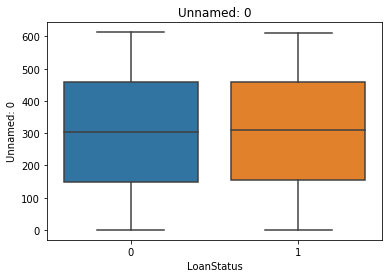

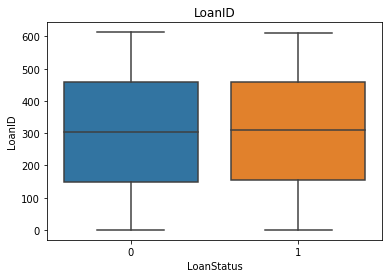

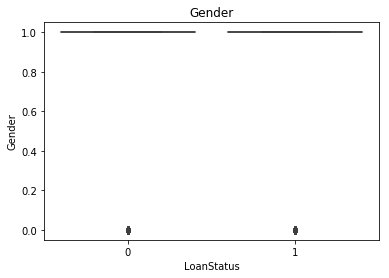

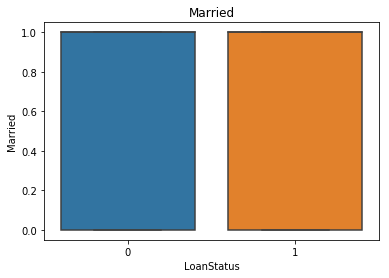

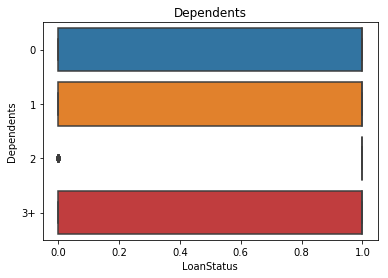

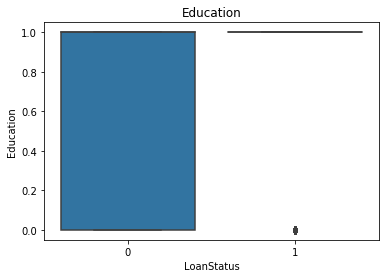

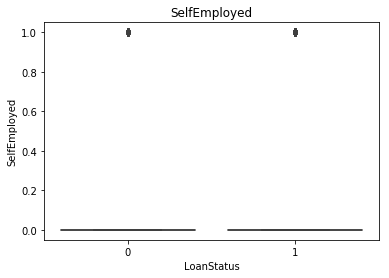

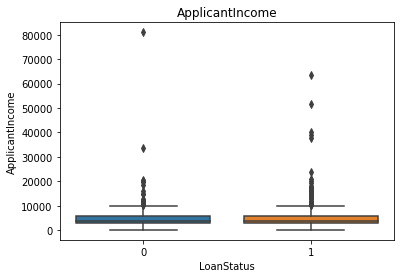

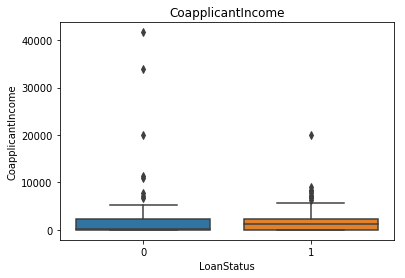

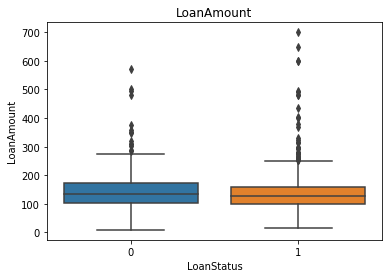

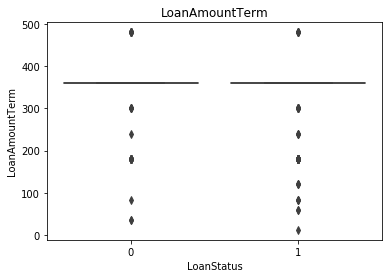

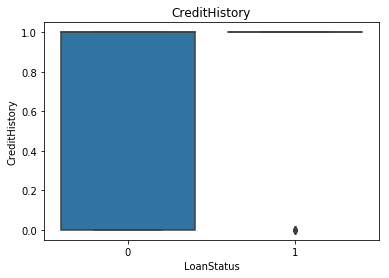

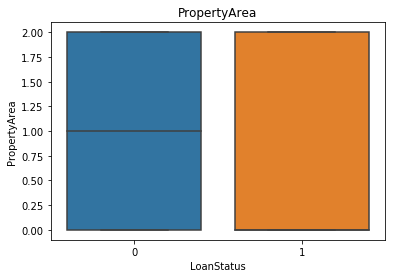

In [24]:
# Outlier Detection
for feature in train.columns:
    if feature != 'LoanStatus':
        sns.boxplot(x ='LoanStatus', y = feature, data = train)
        plt.title(feature)
        plt.show()

In [25]:
#function for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [26]:
num_var = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
#num_var = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('List of Numerical featues', num_var)

List of Numerical featues ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [27]:
train = remove_outliers(train, num_var)

In [28]:
train.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,0.0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1
1,1,1.0,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0
2,2,2.0,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0.0,1
3,3,3.0,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1
4,4,4.0,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1


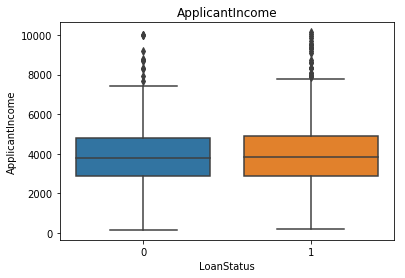

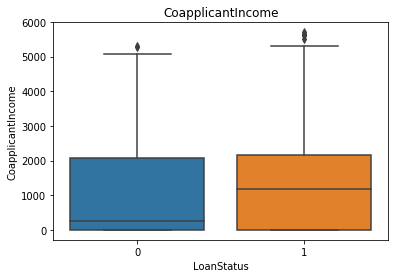

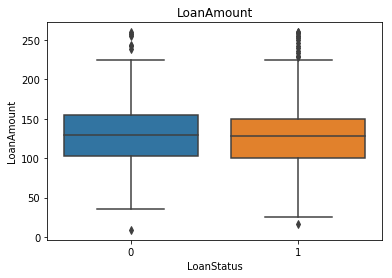

In [29]:
# Outlier Detection
for feature in num_var:
    if feature != 'LoanStatus':
        sns.boxplot(x ='LoanStatus', y = feature, data = train)
        plt.title(feature)
        plt.show()

In [30]:
# pip install -U --user seaborn

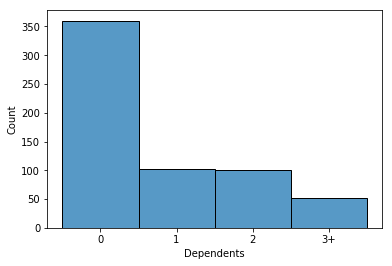

In [31]:
 sns.histplot(train['Dependents'], bins=4)

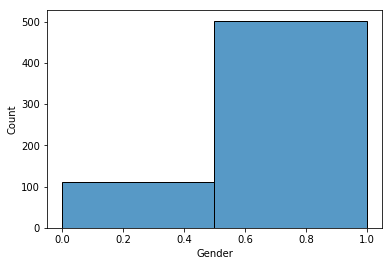

In [32]:
 sns.histplot(train['Gender'], bins=2)

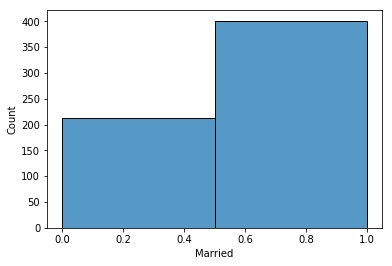

In [33]:
sns.histplot(train['Married'], bins=2)

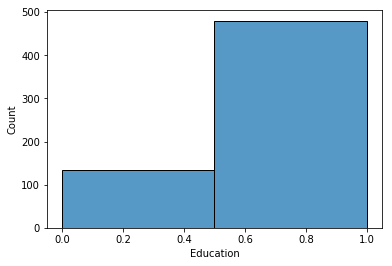

In [34]:
sns.histplot(train['Education'], bins=2)

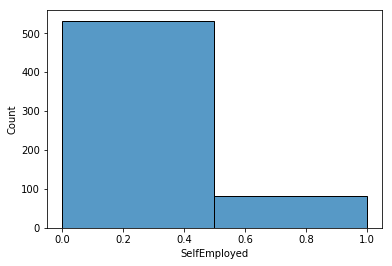

In [35]:
 sns.histplot(train['SelfEmployed'], bins=2)

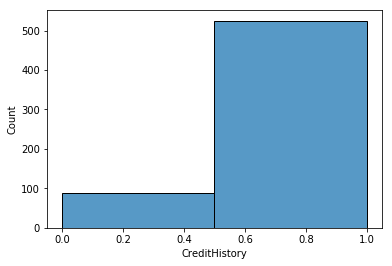

In [36]:
 sns.histplot(train['CreditHistory'], bins=2)

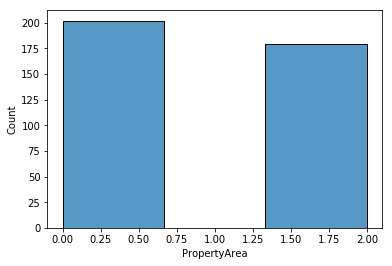

In [37]:
 sns.histplot(train['PropertyArea'], bins=3)

In [38]:
train.head()

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,0.0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1
1,1,1.0,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0
2,2,2.0,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0.0,1
3,3,3.0,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1
4,4,4.0,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1


In [39]:
numerical= train.select_dtypes(include = 'number').columns
numerical

Index(['Unnamed: 0', 'LoanID', 'Gender', 'Married', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

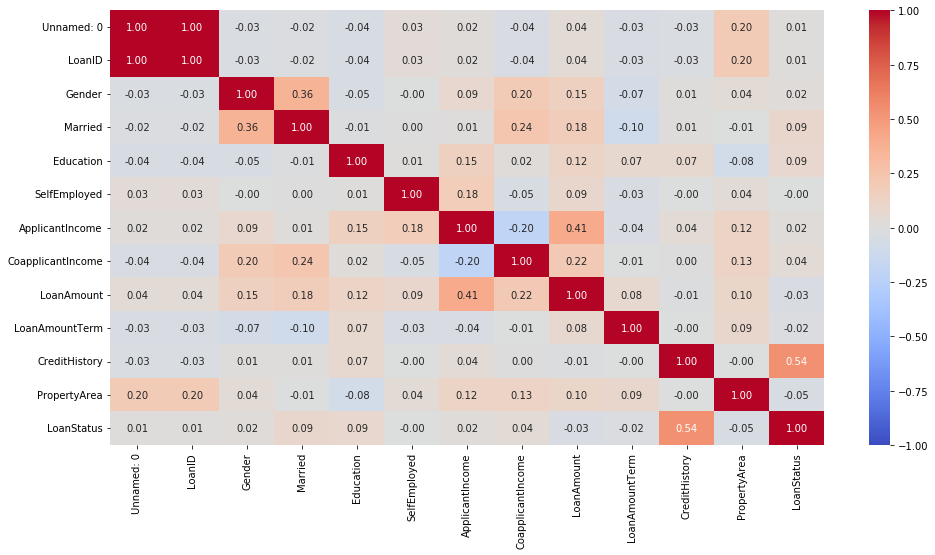

In [40]:
plt.figure(figsize=(16, 8))
sns.heatmap (train.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')


In [41]:
# deleting unnamed column
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test.drop(test.columns[test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0.0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1
1,1.0,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0
2,2.0,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0.0,1
3,3.0,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1
4,4.0,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1


In [42]:
train.dtypes

LoanID               float64
Gender                 int64
Married                int64
Dependents            object
Education              int64
SelfEmployed           int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea         float64
LoanStatus             int64
dtype: object

In [43]:
train['Dependents']. value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [44]:
train['Dependents']=train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Dependents']=test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [45]:
train.dtypes

LoanID               float64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
SelfEmployed           int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea         float64
LoanStatus             int64
dtype: object

In [46]:
train['Gender']. value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [47]:
train['Education']. value_counts()

1    480
0    134
Name: Education, dtype: int64

In [48]:
train['SelfEmployed']. value_counts()

0    532
1     82
Name: SelfEmployed, dtype: int64

In [49]:
train['LoanAmountTerm']. value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: LoanAmountTerm, dtype: int64

In [50]:
train['CreditHistory']. value_counts()

1.0    525
0.0     89
Name: CreditHistory, dtype: int64

In [51]:
cort=train[train.columns[1:]].corr()['LoanStatus'][:]
print(cort.sort_values(ascending=False))

LoanStatus           1.000000
CreditHistory        0.540556
Married              0.091478
Education            0.085884
CoapplicantIncome    0.039885
Gender               0.017987
ApplicantIncome      0.015912
Dependents           0.010118
SelfEmployed        -0.003700
LoanAmountTerm      -0.022549
LoanAmount          -0.031653
PropertyArea        -0.045576
Name: LoanStatus, dtype: float64


In [52]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0.0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1
1,1.0,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0
2,2.0,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0.0,1
3,3.0,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1
4,4.0,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1


In [53]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0.0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1
1,1.0,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0
2,2.0,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0.0,1
3,3.0,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1
4,4.0,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1


Count the number of instances for each of the labels of ‘LoanStatus’. Upsample the minority class with your preferred method. Feature Engineering: All the available features from the dataset are to be used in training the models for loan status prediction. However, computing some additional features might help the model to predict the outcome with increased accuracy. For example, a new feature with the instalment amount can be derived as the dataset contains the total loan amount and the planned number of months for repayment. Likewise, new features can be added for total income and the remaining income after paying the instalments. Thus, in addition to the available features you will construct the following three features:

7- new feature ‘TotalIncome’ by adding ‘ApplicantIncome’ and ‘CoapplicantIncome’ for each instance.

8- A new feature ‘InstalmentAmount’ from ‘LoanAmount’ and ‘LoanAmountTerm’.

9- Calculate the ‘BalancedIncome’ feature by subtracting the ‘InstalmentAmount’ from the ‘TotalIncome’.

In [54]:
# the function to clean the dataset of nan values

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [55]:
train=clean_dataset(train)
test=clean_dataset(test)

In [56]:
# 7- new feature ‘TotalIncome’ by adding ‘ApplicantIncome’ and ‘CoapplicantIncome’ for each instance.
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
print('Updated DataFrame:')
train.head()

Updated DataFrame:


,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,TotalIncome
0,0.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0.0,6091.0
2,2.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,3000.0
3,3.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,4941.0
4,4.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,6000.0


In [57]:
#8- A new feature ‘InstalmentAmount’ from ‘LoanAmount’ and ‘LoanAmountTerm’.
c=train['LoanAmountTerm']/30
train['InstalmentAmount'] = train['LoanAmount'] / c
test['InstalmentAmount'] = test['LoanAmount'] / c
print('Updated DataFrame:')
train.head()

Updated DataFrame:


,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,TotalIncome,InstalmentAmount
0,0.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,5849.0,12.201014
1,1.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0.0,6091.0,10.666667
2,2.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,3000.0,5.500000
3,3.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,4941.0,10.000000
4,4.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,6000.0,11.750000


In [58]:
# 9- Calculate the ‘BalancedIncome’ feature by subtracting the ‘InstalmentAmount’ from the ‘TotalIncome’.
train['BalancedIncome'] = train['TotalIncome'] - train['InstalmentAmount']
test['BalancedIncome'] = test['TotalIncome'] - test['InstalmentAmount']
print('Updated DataFrame:')
train.head()

Updated DataFrame:


,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,TotalIncome,InstalmentAmount,BalancedIncome
0,0.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,5849.0,12.201014,5836.798986
1,1.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0.0,6091.0,10.666667,6080.333333
2,2.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,3000.0,5.500000,2994.500000
3,3.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,4941.0,10.000000,4931.000000
4,4.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,6000.0,11.750000,5988.250000


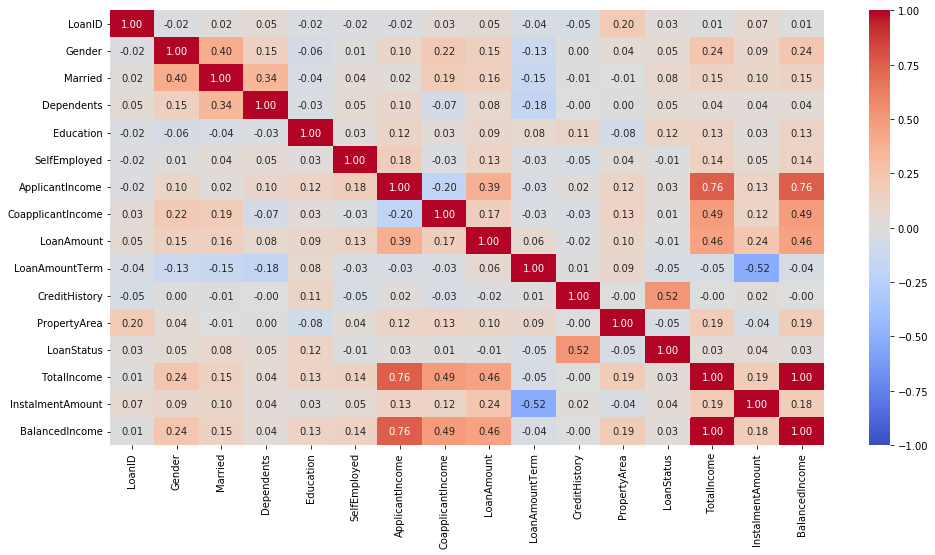

In [59]:
plt.figure(figsize=(16, 8))
sns.heatmap (train.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [60]:
# deleting TotalIncome column since it has a strong correlation with BalancedIncome
train.drop(train.columns[train.columns.str.contains('TotalIncome',case = False)],axis = 1, inplace = True)
test.drop(test.columns[test.columns.str.contains('TotalIncome',case = False)],axis = 1, inplace = True)

train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,InstalmentAmount,BalancedIncome
0,0.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,12.201014,5836.798986
1,1.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,2.0,0.0,10.666667,6080.333333
2,2.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,5.500000,2994.500000
3,3.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,10.000000,4931.000000
4,4.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,11.750000,5988.250000


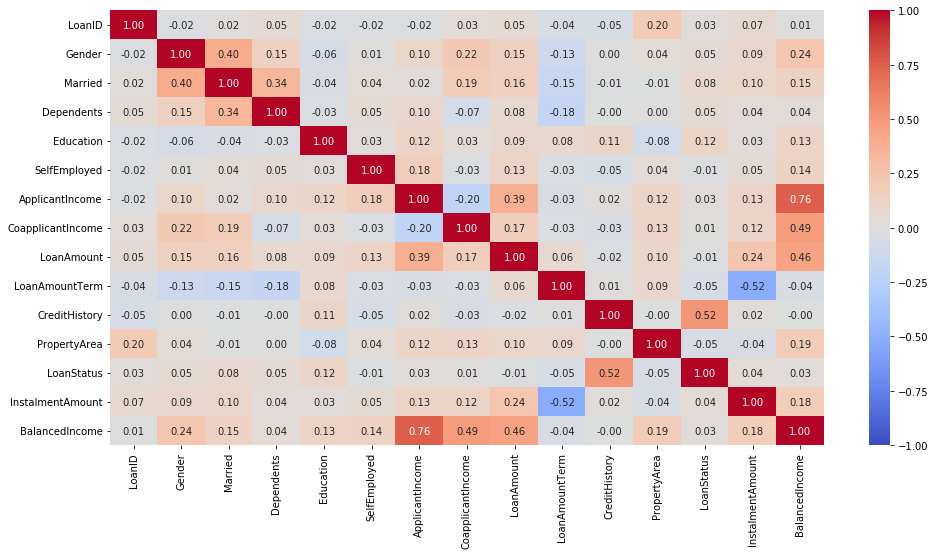

In [61]:
plt.figure(figsize=(16, 8))
sns.heatmap (train.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [62]:
# import Standard Scaler from preprocesing module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scale_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmountTerm']
train[scale_columns] = scaler.fit_transform(train[scale_columns])

In [64]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,InstalmentAmount,BalancedIncome
0,0.0,1.0,0.0,0.0,1.0,0.0,0.901184,-0.909864,0.416601,0.308182,1.0,0.0,1.0,12.201014,5836.798986
1,1.0,1.0,1.0,1.0,1.0,0.0,0.242957,0.135723,-0.002750,0.308182,1.0,2.0,0.0,10.666667,6080.333333
2,2.0,1.0,1.0,0.0,1.0,1.0,-0.580086,-0.909864,-1.414849,0.308182,1.0,0.0,1.0,5.500000,2994.500000
3,3.0,1.0,1.0,0.0,0.0,0.0,-0.796895,0.725079,-0.184957,0.308182,1.0,0.0,1.0,10.000000,4931.000000
4,4.0,1.0,0.0,0.0,1.0,0.0,0.979692,-0.909864,0.293335,0.308182,1.0,0.0,1.0,11.750000,5988.250000


# ML models

## Classification

## This is a classification problem because we need to classify customers into two classes based on the variables to decide whether the LoanStatus is YES or NO.

In [65]:
X_train=train.drop('LoanStatus', axis=1)
y_train=train['LoanStatus']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_test_actual=test.drop('LoanStatus', axis=1)
y_test_actual=test['LoanStatus']

# Random Forest before sampling phase

In [66]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [67]:
#sklearn's RandomForestClassifier and DecisionTreeClassifier silently convert the array to float32 then we need this line of code:
X_test_actual = np.nan_to_num(X_test_actual.astype(np.float32))

model_rfc1 = RandomForestClassifier()

scores = cross_val_score(model_rfc1, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model_rfc1.fit(X_train,y_train)

#Prediction on trained data
y_pred_rtrain = model_rfc1.predict(X_train)
print("classification_report for trained data")
print(metrics.classification_report(y_train,y_pred_rtrain))


#Prediction on unseen and testing data
y_pred_rtest = model_rfc1.predict(X_test_actual)
print("classification_report for testing data")
print(metrics.classification_report(y_test_actual,y_pred_rtest))


precision_rfc1 = metrics.precision_score(y_test_actual, y_pred_rtest)
recall_rfc1 = metrics.recall_score(y_test_actual, y_pred_rtest)
f1_rfc1 = metrics.f1_score(y_test_actual, y_pred_rtest)

Accuracy: 0.758 (0.059)
classification_report for trained data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       138
         1.0       1.00      1.00      1.00       243

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381

classification_report for testing data
              precision    recall  f1-score   support

         0.0       0.18      1.00      0.31        42
         1.0       1.00      0.09      0.16       209

    accuracy                           0.24       251
   macro avg       0.59      0.54      0.23       251
weighted avg       0.86      0.24      0.18       251



In [68]:
# We can see clearly the accuracy metrics for Random Forest on trained data is much higher than the metrics on testing data and it is natual because the accuracy metrics on unseen data always lower than the accuracy metrics on trained data.

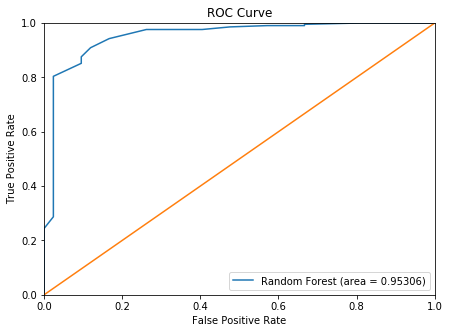

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


y_pred_rtest = model_rfc1.predict_proba(X_test_actual)[:, 1]
rfc1_auc = metrics.roc_auc_score(y_test_actual, y_pred_rtest)

# plotting ROC curve
fprr1, tprr1, thresholdsr1 = roc_curve(y_test_actual, y_pred_rtest)
plt.figure(figsize =(7,5))
plt.plot(fprr1, tprr1, label='Random Forest (area = %0.5f)' % rfc1_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [70]:
y_pred_rtest1 = model_rfc1.predict(X_test_actual)
conrfc1 = metrics.confusion_matrix(y_test_actual, y_pred_rtest1)
conrfc1

array([[ 42,   0],
       [191,  18]], dtype=int64)

# Decision Tree before sampling phase

In [71]:
#sklearn's RandomForestClassifier and DecisionTreeClassifier silently convert the array to float32 then we need this line of code:
X_test_actual = np.nan_to_num(X_test_actual.astype(np.float32))

model_DT1=DecisionTreeClassifier(criterion='entropy',max_depth=5)

scores = cross_val_score(model_DT1, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model_DT1.fit(X_train,y_train)

#Prediction on trained data
y_pred_dtrain=model_DT1.predict(X_train)
print("classification_report for trained data")
print(metrics.classification_report(y_train,y_pred_dtrain))

#Prediction on unseen and testing data
y_pred_dtest=model_DT1.predict(X_test_actual)
print("classification_report for testing data")
print(metrics.classification_report(y_test_actual,y_pred_dtest))

precision_dt1 = metrics.precision_score(y_test_actual, y_pred_dtest)
recall_dt1 = metrics.recall_score(y_test_actual, y_pred_dtest)
f1_dt1 = metrics.f1_score(y_test_actual, y_pred_dtest)

Accuracy: 0.766 (0.071)
classification_report for trained data
              precision    recall  f1-score   support

         0.0       0.93      0.54      0.68       138
         1.0       0.79      0.98      0.87       243

    accuracy                           0.82       381
   macro avg       0.86      0.76      0.78       381
weighted avg       0.84      0.82      0.80       381

classification_report for testing data
              precision    recall  f1-score   support

         0.0       0.26      0.93      0.41        42
         1.0       0.97      0.48      0.64       209

    accuracy                           0.55       251
   macro avg       0.62      0.70      0.53       251
weighted avg       0.85      0.55      0.60       251



In [72]:
# Like Random Forest, We can also see clearly the accuracy metrics for Decision Tree on trained data is higher than the metrics on testing data. and it is natual because the accuracy metrics on unseen data always lower than the accuracy metrics on trained data.

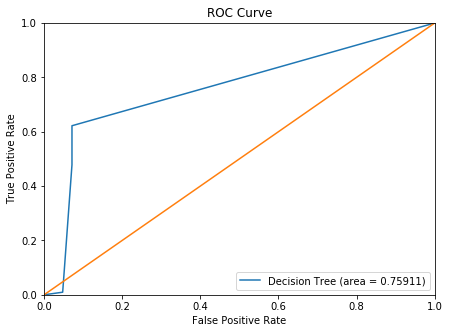

In [73]:
y_pred_dtest = model_DT1.predict_proba(X_test_actual)[:, 1]
dt1_auc = metrics.roc_auc_score(y_test_actual, y_pred_dtest)

# plotting ROC curve
fprd1, tprd1, thresholdsd1 = roc_curve(y_test_actual, y_pred_dtest)
plt.figure(figsize =(7,5))
plt.plot(fprd1, tprd1, label='Decision Tree (area = %0.5f)' % dt1_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
y_pred_dtest1 = model_DT1.predict(X_test_actual)
condt1 = metrics.confusion_matrix(y_test_actual, y_pred_dtest1)
condt1

array([[ 39,   3],
       [109, 100]], dtype=int64)

# Using K-Fold Cross validation technique

In [75]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model_DT2=DecisionTreeClassifier(criterion='entropy',max_depth=5)
# evaluate model
scores = cross_val_score(model_DT2, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.769 (0.071)


In [76]:
# We can see the accuracy metric for decision tree model improves from 49% to 60% after using K-Fold-Cross-Validation technique with number of splits of 10.  

In [77]:
# scores for decisin tree and random forest before SMOTE (D=Deafult)

auc_score_all =[dt1_auc,rfc1_auc]
recall_all = [recall_dt1,recall_rfc1]
precision_all = [precision_dt1,precision_rfc1]
f1_all =[f1_dt1,f1_rfc1]

sm_cv = pd.DataFrame({'Prec_D':precision_all,'Rec_D':recall_all,'F1_D':f1_all,'AUC_D':auc_score_all},index =['Decision tree','Random Forest'])
sm_cv

,Prec_D,Rec_D,F1_D,AUC_D
Decision tree,0.970874,0.478469,0.641026,0.759114
Random Forest,1.000000,0.086124,0.158590,0.953064


# Using an OverSampling technique,SMOTE, for taining data

In [78]:
#pip install imbalanced-learn

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

# Minority Over Sampling Technique
sm = SMOTE()
#X, y = oversample.fit_resample(X, y)

#sm = SMOTE(sampling_strategy = 0, random_state=1)   
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_sm==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_sm==1)))

Before upsampling count of label 0 138
Before upsampling count of label 1 243
After upsampling count of label 0 243
After upsampling count of label 1 243


# Decision Tree after SMOTE

In [79]:
#sklearn's RandomForestClassifier and DecisionTreeClassifier silently convert the array to float32 then we need this line of code:
X_test_actual = np.nan_to_num(X_test_actual.astype(np.float32))


model_DT2=DecisionTreeClassifier(criterion='entropy',max_depth=5)

scores = cross_val_score(model_DT2, X_train_sm,y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model_DT2.fit(X_train_sm,y_train_sm)
y_pred_dtest2=model_DT2.predict(X_test_actual)


print(metrics.classification_report(y_test_actual,y_pred_dtest2))

precision_dt2 = metrics.precision_score(y_test_actual, y_pred_dtest2)
recall_dt2 = metrics.recall_score(y_test_actual, y_pred_dtest2)
f1_dt2 = metrics.f1_score(y_test_actual, y_pred_dtest2)

Accuracy: 0.769 (0.052)
              precision    recall  f1-score   support

         0.0       0.30      0.95      0.45        42
         1.0       0.98      0.55      0.70       209

    accuracy                           0.61       251
   macro avg       0.64      0.75      0.58       251
weighted avg       0.87      0.61      0.66       251



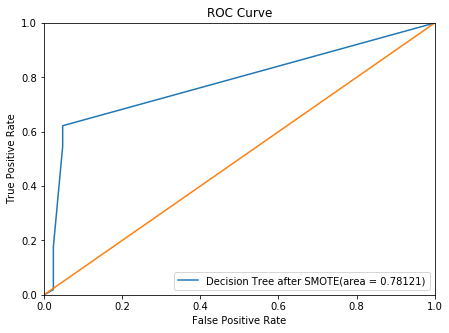

In [80]:
#ROC-AUC for decision tree after SMOTE
y_pred_dtest2 = model_DT2.predict_proba(X_test_actual)[:, 1]
dt2_auc = metrics.roc_auc_score(y_test_actual, y_pred_dtest2)

# plotting ROC curve
fprd2, tprd2, thresholdsd2 = roc_curve(y_test_actual, y_pred_dtest2)
plt.figure(figsize =(7,5))
plt.plot(fprd2, tprd2, label='Decision Tree after SMOTE(area = %0.5f)' % dt2_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
y_pred_dtest2 = model_DT2.predict(X_test_actual)
condt2 = metrics.confusion_matrix(y_test_actual, y_pred_dtest2)
condt2

array([[ 40,   2],
       [ 95, 114]], dtype=int64)

# Random Forest after SMOTE

In [82]:
model_rfc2 = RandomForestClassifier()

scores = cross_val_score(model_rfc2, X_train_sm,y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model_rfc2.fit(X_train_sm,y_train_sm)
y_pred_rtest2 = model_rfc2.predict(X_test_actual)

# Accuracy
print(metrics.classification_report(y_test_actual,y_pred_rtest2))

precision_rfc2 = metrics.precision_score(y_test_actual, y_pred_rtest2)
recall_rfc2 = metrics.recall_score(y_test_actual, y_pred_rtest2)
f1_rfc2 = metrics.f1_score(y_test_actual, y_pred_rtest2)


Accuracy: 0.817 (0.052)
              precision    recall  f1-score   support

         0.0       0.23      1.00      0.37        42
         1.0       1.00      0.31      0.47       209

    accuracy                           0.43       251
   macro avg       0.61      0.66      0.42       251
weighted avg       0.87      0.43      0.46       251



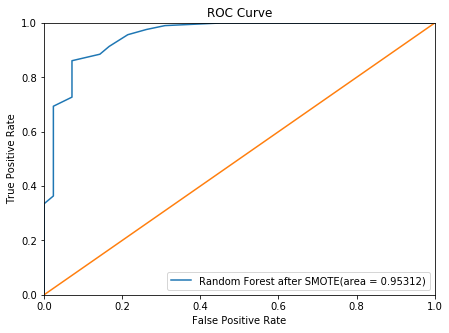

In [83]:
#ROC-AUC for random forest after SMOTE


y_pred_rtest2 = model_rfc2.predict_proba(X_test_actual)[:, 1]
rfc2_auc = metrics.roc_auc_score(y_test_actual, y_pred_rtest2)

# plotting ROC curve
fprr2, tprr2, thresholdsr2 = roc_curve(y_test_actual, y_pred_rtest2)
plt.figure(figsize =(7,5))
plt.plot(fprr2, tprr2, label='Random Forest after SMOTE(area = %0.5f)' % rfc2_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
# scores for decisin tree and random forest after SMOTE (SM=SMOTE)

auc_score_all2 =[dt2_auc,rfc2_auc]
recall_all2 = [recall_dt2,recall_rfc2]
precision_all2 = [precision_dt2,precision_rfc2]
f1_all2 =[f1_dt2,f1_rfc2]

sm_cv2 = pd.DataFrame({'Prec_SM':precision_all2,'Rec_SM':recall_all2,'F1_SM':f1_all2,'AUC_SM':auc_score_all2},index =['Decision tree','Random Forest'])
sm_cv2

,Prec_SM,Rec_SM,F1_SM,AUC_SM
Decision tree,0.982759,0.545455,0.701538,0.781214
Random Forest,1.000000,0.311005,0.474453,0.953121


In [85]:
y_pred_rtest2 = model_rfc2.predict(X_test_actual)
conrfc2 = metrics.confusion_matrix(y_test_actual, y_pred_rtest2)
conrfc2

array([[ 42,   0],
       [144,  65]], dtype=int64)

# Applying SMOTETOMEK

In [86]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_st, y_train_st= resample.fit_resample(X_train, y_train.ravel())


In [87]:
#pip install -U --user imbalanced-learn
#pip install -U --user imbalanced-learn

# Decision Tree after SMOTETOMEK

In [88]:
model_DT3=DecisionTreeClassifier(criterion='entropy',max_depth=5)
# evaluate model
scores = cross_val_score(model_DT3, X_train_st,y_train_st, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model_DT3.fit(X_train_st,y_train_st)
y_pred_dtest3=model_DT3.predict(X_test_actual)


print(classification_report(y_test_actual,y_pred_dtest3))

precision_dt3 = metrics.precision_score(y_test_actual, y_pred_dtest3)
recall_dt3 = metrics.recall_score(y_test_actual, y_pred_dtest3)
f1_dt3 = metrics.f1_score(y_test_actual, y_pred_dtest3)

Accuracy: 0.787 (0.076)
              precision    recall  f1-score   support

         0.0       0.30      0.95      0.46        42
         1.0       0.98      0.56      0.71       209

    accuracy                           0.62       251
   macro avg       0.64      0.75      0.58       251
weighted avg       0.87      0.62      0.67       251



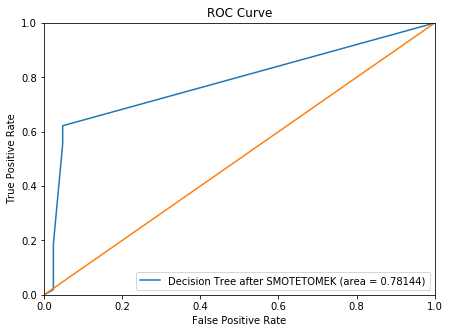

In [89]:
#ROC-AUC for Decision Tree after SMOTETOMEK
y_pred_dtest3 = model_DT3.predict_proba(X_test_actual)[:, 1]
dt3_auc = metrics.roc_auc_score(y_test_actual, y_pred_dtest3)

# plotting ROC curve
fprd3, tprd3, thresholdsd3 = roc_curve(y_test_actual, y_pred_dtest3)
plt.figure(figsize =(7,5))
plt.plot(fprd3, tprd3, label='Decision Tree after SMOTETOMEK (area = %0.5f)' % dt3_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
y_pred_dtest3 = model_DT3.predict(X_test_actual)
condt3 = metrics.confusion_matrix(y_test_actual, y_pred_dtest3)
condt3

array([[ 40,   2],
       [ 93, 116]], dtype=int64)

# Random Forest after SMOTETOMEK

In [91]:
model_rfc3 = RandomForestClassifier()
scores = cross_val_score(model_rfc3, X_train_st,y_train_st, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model_rfc3.fit(X_train_st,y_train_st)
y_pred_rtest3 = model_rfc3.predict(X_test_actual)

# Accuracy
print(metrics.classification_report(y_test_actual,y_pred_rtest3))

precision_rfc3 = metrics.precision_score(y_test_actual, y_pred_rtest3)
recall_rfc3 = metrics.recall_score(y_test_actual, y_pred_rtest3)
f1_rfc3 = metrics.f1_score(y_test_actual, y_pred_rtest3)

Accuracy: 0.828 (0.061)
              precision    recall  f1-score   support

         0.0       0.21      0.98      0.34        42
         1.0       0.98      0.25      0.40       209

    accuracy                           0.37       251
   macro avg       0.59      0.61      0.37       251
weighted avg       0.85      0.37      0.39       251



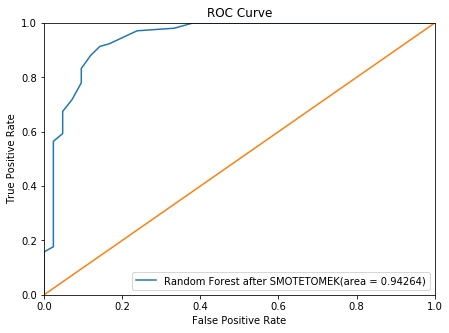

In [92]:
#ROC-AUC for random forest after SMOTETOMEK


y_pred_rtest3 = model_rfc3.predict_proba(X_test_actual)[:, 1]
rfc3_auc = metrics.roc_auc_score(y_test_actual, y_pred_rtest3)

# plotting ROC curve
fprr3, tprr3, thresholdsr3 = roc_curve(y_test_actual, y_pred_rtest3)
plt.figure(figsize =(7,5))
plt.plot(fprr3, tprr3, label='Random Forest after SMOTETOMEK(area = %0.5f)' % rfc3_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
# scores for decisin tree and random forest after SMOTETOMEK (ST=SMOTETOMEK)

auc_score_all3 =[dt3_auc,rfc3_auc]
recall_all3 = [recall_dt3,recall_rfc3]
precision_all3 = [precision_dt3,precision_rfc3]
f1_all3 =[f1_dt3,f1_rfc3]

sm_cv3 = pd.DataFrame({'Prec_ST':precision_all3,'Rec_ST':recall_all3,'F1_ST':f1_all3,'AUC_ST':auc_score_all3},index =['Decision tree','Random Forest'])
sm_cv3

,Prec_ST,Rec_ST,F1_ST,AUC_ST
Decision tree,0.983051,0.555024,0.709480,0.781442
Random Forest,0.981132,0.248804,0.396947,0.942641


In [94]:
y_pred_rtest3 = model_rfc3.predict(X_test_actual)
conrfc3 = metrics.confusion_matrix(y_test_actual, y_pred_rtest3)
conrfc3

array([[ 41,   1],
       [157,  52]], dtype=int64)

#  Comparing all results

In [95]:
# Seeing all the results in one table
pd.concat([sm_cv,sm_cv2,sm_cv3], axis=1)

,Prec_D,Rec_D,F1_D,AUC_D,Prec_SM,Rec_SM,F1_SM,AUC_SM,Prec_ST,Rec_ST,F1_ST,AUC_ST
Decision tree,0.970874,0.478469,0.641026,0.759114,0.982759,0.545455,0.701538,0.781214,0.983051,0.555024,0.709480,0.781442
Random Forest,1.000000,0.086124,0.158590,0.953064,1.000000,0.311005,0.474453,0.953121,0.981132,0.248804,0.396947,0.942641


<Figure size 432x288 with 0 Axes>

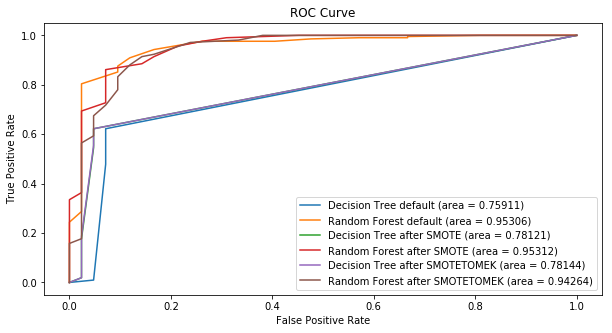

In [96]:
# Seeing all the ROC-AUC results in one diagram
plt.figure(0).clf()

plt.figure(figsize =(10,5))

plt.plot(fprd1,tprd1,label='Decision Tree default (area = %0.5f)' % dt1_auc)
plt.plot(fprr1,tprr1,label='Random Forest default (area = %0.5f)' % rfc1_auc)

plt.plot(fprd2,tprd2,label='Decision Tree after SMOTE (area = %0.5f)' % dt2_auc)
plt.plot(fprr2,tprr2,label='Random Forest after SMOTE (area = %0.5f)' % rfc2_auc)

plt.plot(fprd3,tprd3,label='Decision Tree after SMOTETOMEK (area = %0.5f)' % dt3_auc)
plt.plot(fprr3,tprr3,label='Random Forest after SMOTETOMEK (area = %0.5f)' % rfc3_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

As we can see based on the results, regarding the ROC AUC, Random Forest outperforms Decision Tree both before and after applying data sampling techniques.
regarding the F1-measure, Decision Tree outperforms Random Forest both before and after applying data sampling techniques.
